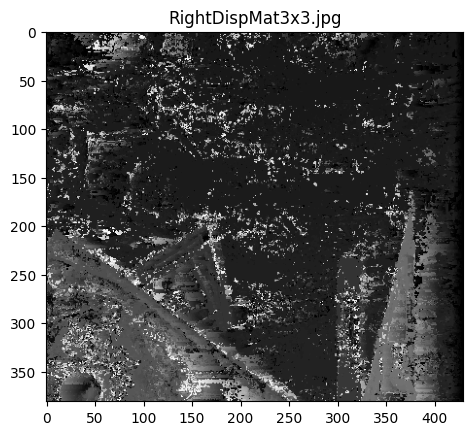

MSE for Left Disparity Matrix before Consistency check for 3x3  111.11008362326803
MSE for Right Disparity Matrix before Consistency check for 3x3  110.23523164255631
MSE for Left Disparity Matrix after Consistency check for 3x3  61.82453763047061
MSE for Right Disparity Matrix after Consistency check for 3x3  61.39122871268999


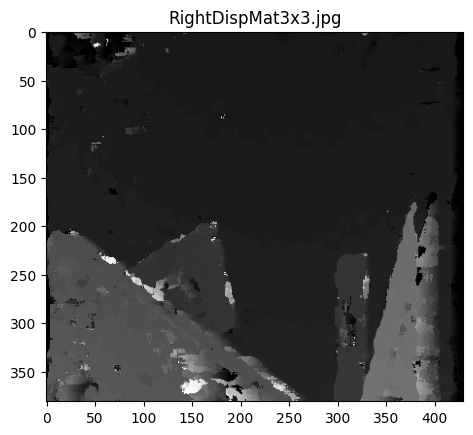

MSE for Left Disparity Matrix before Consistency check for 9x9  115.07596288835988
MSE for Right Disparity Matrix before Consistency check for 9x9  113.77460782518465


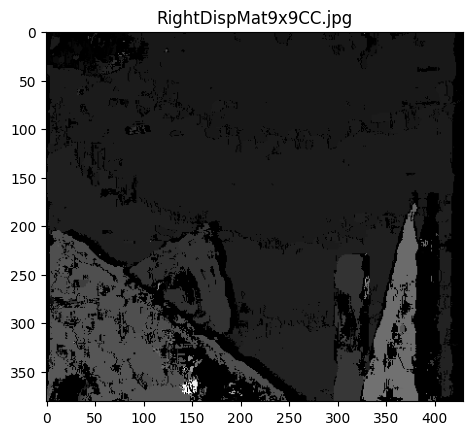

MSE for Left Disparity Matrix after Consistency check for 9x9  93.49091741439297
MSE for Right Disparity Matrix after Consistency check for 9x9  92.62607581029116


In [7]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt

def leftDispEst(left_img, right_img, pad):
    leftDisparityMat = np.zeros(shape=left_img.shape, dtype="uint8")
    left_img = cv2.copyMakeBorder(left_img, pad, pad, pad, pad, cv2.BORDER_CONSTANT, 0)
    right_img = cv2.copyMakeBorder(right_img, pad, pad, pad, pad, cv2.BORDER_CONSTANT, 0)

    for i in range(pad, left_img.shape[0] - pad):
        #         print i
        for j in range(pad, left_img.shape[1] - pad):
            #         print i, j
            local_min = sys.maxsize
            min_index = j
            leftTemp = left_img[i - pad:i + pad + 1:, j - pad:j + pad + 1:]
            #             print leftTemp
            k = j
            while (j - k < 75) and (k != pad):
                #             print left_img[i-pad:i+pad+1:, j-pad:j+pad+1:]
                #                 print right_img[i-pad:i+pad+1:, k-pad:k+pad+1:]
                tempSum = np.sum((leftTemp - right_img[i - pad:i + pad + 1:, k - pad:k + pad + 1:]) ** 2)
                if tempSum < local_min:
                    local_min = tempSum
                    min_index = k

                k = k - 1

            leftDisparityMat[i - pad][j - pad] = j - min_index

    return leftDisparityMat


def rightDispEst(left_img, right_img, pad):
    rightDisparityMat = np.zeros(shape=right_img.shape, dtype="uint8")
    right_img = cv2.copyMakeBorder(right_img, pad, pad, pad, pad, cv2.BORDER_CONSTANT, 0)
    left_img = cv2.copyMakeBorder(left_img, pad, pad, pad, pad, cv2.BORDER_CONSTANT, 0)

    for i in range(pad, right_img.shape[0] - pad):
        #         print i
        for j in range(pad, right_img.shape[1] - pad):
            #         print i, j
            local_min = sys.maxsize
            min_index = j
            rightTemp = right_img[i - pad:i + pad + 1:, j - pad:j + pad + 1:]
            k = j
            while (k - j < 75) and (k < (right_img.shape[1] - pad)):
                #             print left_img[i-pad:i+pad+1:, j-pad:j+pad+1:]
                #             print right_img[i-pad:i+pad+1:, k-pad:k+pad+1:]
                tempSum = np.sum((rightTemp - left_img[i - pad:i + pad + 1:, k - pad:k + pad + 1:]) ** 2)

                if tempSum < local_min:
                    local_min = tempSum
                    min_index = k

                k = k + 1

            rightDisparityMat[i - pad][j - pad] = min_index - j

    return rightDisparityMat


if __name__ == "__main__":
    left_img = cv2.imread('docs/barn2/im0.ppm', 0)
    right_img = cv2.imread('docs/barn2/im8.ppm', 0)

    gdLeft = cv2.imread('docs/barn2/disp2.pgm', 0)
    gdRight = cv2.imread('docs/barn2/disp6.pgm', 0)

    leftDisparityMatrix = leftDispEst(left_img, right_img, 1)
    rightDisparityMatrix = rightDispEst(left_img, right_img, 1)
    
    # cv2.imwrite('LeftDispMat3x3.jpg', leftDisparityMatrix)
    plt.title("LeftDispMat3x3.jpg")
    plt.imshow(leftDisparityMatrix, 'gray')

    # cv2.imwrite('RightDispMat3x3.jpg', rightDisparityMatrix)
    plt.title("RightDispMat3x3.jpg")
    plt.imshow(rightDisparityMatrix, 'gray')
    
    plt.show()

    print("MSE for Left Disparity Matrix before Consistency check for 3x3 ", np.mean((gdLeft - leftDisparityMatrix) ** 2))
    print("MSE for Right Disparity Matrix before Consistency check for 3x3 ", np.mean((gdRight - rightDisparityMatrix) ** 2))

    #Consistency check
    leftDisparityMatrixC = np.zeros(shape=left_img.shape, dtype="uint8")
    for i in range(0, left_img.shape[0]):
        for j in range(0, left_img.shape[1]):
            if (rightDisparityMatrix[i][j - leftDisparityMatrix[i][j]]) != (leftDisparityMatrix[i][j]):
                leftDisparityMatrixC[i][j] = 0
                gdLeft[i][j] = 0
            else:
                leftDisparityMatrixC[i][j] = leftDisparityMatrix[i][j]

    rightDisparityMatrixC = np.zeros(shape=left_img.shape, dtype="uint8")
    for i in range(0, left_img.shape[0]):
        for j in range(0, left_img.shape[1]):
            if (leftDisparityMatrix[i][j + rightDisparityMatrix[i][j]]) != (rightDisparityMatrix[i][j]):
                rightDisparityMatrixC[i][j] = 0
                gdRight[i][j] = 0
            else:
                rightDisparityMatrixC[i][j] = rightDisparityMatrix[i][j]

    # cv2.imwrite('LeftDispMat3x3CC.jpg', leftDisparityMatrixC)
    plt.title("LeftDispMat3x3CC.jpg")
    plt.imshow(leftDisparityMatrixC, 'gray')
    
    # cv2.imwrite('RightDispMat3x3CC.jpg', rightDisparityMatrixC)
    plt.title("RightDispMat3x3CC.jpg")
    plt.imshow(rightDisparityMatrixC, 'gray')

    print("MSE for Left Disparity Matrix after Consistency check for 3x3 ", np.mean((gdLeft - leftDisparityMatrixC) ** 2))
    print("MSE for Right Disparity Matrix after Consistency check for 3x3 ", np.mean((gdRight - rightDisparityMatrixC) ** 2))

    #9x9 block
    gdLeft = cv2.imread('docs/barn2/disp2.pgm', 0)
    gdRight = cv2.imread('docs/barn2/disp6.pgm', 0)

    leftDisparityMatrix = leftDispEst(left_img, right_img, 4)
    rightDisparityMatrix = rightDispEst(left_img, right_img, 4)

    # cv2.imwrite('LeftDispMat9x9.jpg', leftDisparityMatrix)
    plt.title("LeftDispMat9x9.jpg")
    plt.imshow(leftDisparityMatrix, 'gray')
    
    # cv2.imwrite('RightDispMat3x3.jpg', rightDisparityMatrix)
    plt.title("RightDispMat3x3.jpg")
    plt.imshow(rightDisparityMatrix, 'gray')
    
    plt.show()

    print("MSE for Left Disparity Matrix before Consistency check for 9x9 ", np.mean((gdLeft - leftDisparityMatrix) ** 2))
    print("MSE for Right Disparity Matrix before Consistency check for 9x9 ", np.mean((gdRight - rightDisparityMatrix) ** 2))

    #Consistency check
    leftDisparityMatrixC = np.zeros(shape=left_img.shape, dtype="uint8")
    for i in range(0, left_img.shape[0]):
        for j in range(0, left_img.shape[1]):
            if (rightDisparityMatrix[i][j - leftDisparityMatrix[i][j]]) != (leftDisparityMatrix[i][j]):
                leftDisparityMatrixC[i][j] = 0
                gdLeft[i][j] = 0
            else:
                leftDisparityMatrixC[i][j] = leftDisparityMatrix[i][j]

    rightDisparityMatrixC = np.zeros(shape=left_img.shape, dtype="uint8")
    for i in range(0, left_img.shape[0]):
        for j in range(0, left_img.shape[1]):
            if (leftDisparityMatrix[i][j + rightDisparityMatrix[i][j]]) != (rightDisparityMatrix[i][j]):
                rightDisparityMatrixC[i][j] = 0
                gdRight[i][j] = 0
            else:
                rightDisparityMatrixC[i][j] = rightDisparityMatrix[i][j]

    # cv2.imwrite('LeftDispMat9x9CC.jpg', leftDisparityMatrixC)
    plt.title("LeftDispMat9x9CC.jpg")
    plt.imshow(leftDisparityMatrixC, 'gray')
    
    # cv2.imwrite('RightDispMat9x9CC.jpg', rightDisparityMatrixC)
    plt.title("RightDispMat9x9CC.jpg")
    plt.imshow(rightDisparityMatrixC, 'gray')
    
    plt.show()
    
    print("MSE for Left Disparity Matrix after Consistency check for 9x9 ", np.mean((gdLeft - leftDisparityMatrixC) ** 2))
    print("MSE for Right Disparity Matrix after Consistency check for 9x9 ", np.mean((gdRight - rightDisparityMatrixC) ** 2))


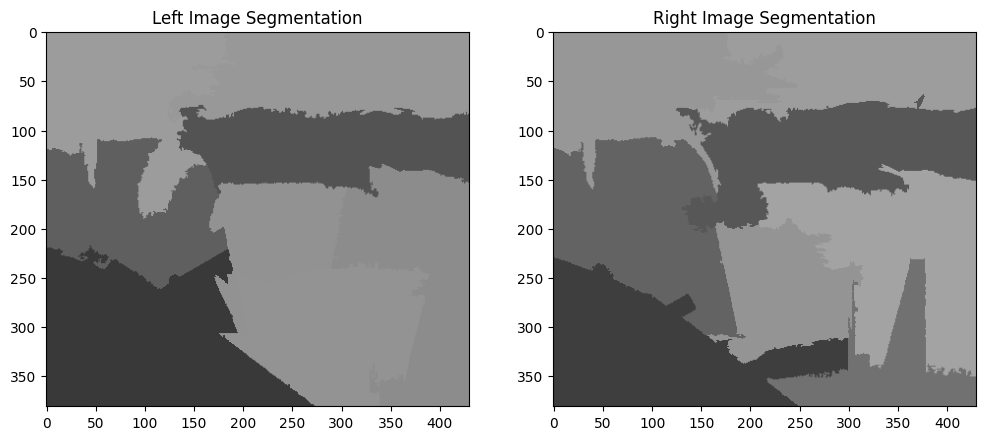

Left superpixel 0 matches with right superpixel 1
Left superpixel 1 matches with right superpixel 0
Left superpixel 2 matches with right superpixel 2
Left superpixel 3 matches with right superpixel 3
Left superpixel 4 matches with right superpixel 5
Left superpixel 5 matches with right superpixel 5
Left superpixel 6 matches with right superpixel 6
Left superpixel 7 matches with right superpixel 5


In [4]:
import cv2
from skimage.segmentation import slic
from skimage.color import label2rgb
import matplotlib.pyplot as plt

# Load stereo images
left_img = cv2.imread('docs/barn2/im0.ppm', 0)
right_img = cv2.imread('docs/barn2/im8.ppm', 0)

# Convert images to RGB
left_img_rgb = cv2.cvtColor(left_img, cv2.COLOR_BGR2RGB)
right_img_rgb = cv2.cvtColor(right_img, cv2.COLOR_BGR2RGB)

# Apply SLIC superpixel segmentation
num_segments = 11  # Adjust number of segments as needed
left_segments = slic(left_img_rgb, n_segments=num_segments, compactness=10)
right_segments = slic(right_img_rgb, n_segments=num_segments, compactness=10)

# Function to calculate color similarity
def color_similarity(seg1, seg2):
    return np.linalg.norm(np.mean(seg1, axis=0) - np.mean(seg2, axis=0))

# Function to get superpixel colors
def get_superpixel_colors(image, segments):
    colors = []
    for segment_label in np.unique(segments):
        mask = segments == segment_label
        segment_colors = image[mask]
        colors.append(segment_colors)
    return colors

# Get superpixel colors for left and right images
left_superpixel_colors = get_superpixel_colors(left_img_rgb, left_segments)
right_superpixel_colors = get_superpixel_colors(right_img_rgb, right_segments)

# Epipolar line matching
def match_superpixels(left_colors, right_colors):
    matches = []
    for left_idx, left_color in enumerate(left_colors):
        best_match = None
        best_similarity = float('inf')
        for right_idx, right_color in enumerate(right_colors):
            similarity = color_similarity(left_color, right_color)
            if similarity < best_similarity:
                best_similarity = similarity
                best_match = right_idx
        matches.append((left_idx, best_match))
    return matches

# Find matches between left and right superpixels
matches = match_superpixels(left_superpixel_colors, right_superpixel_colors)

# Visualize the segmentation and matches
left_label_rgb = label2rgb(left_segments, left_img_rgb, kind='avg')
right_label_rgb = label2rgb(right_segments, right_img_rgb, kind='avg')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Left Image Segmentation')
# plt.imshow(left_segments)
plt.imshow(left_label_rgb)

plt.subplot(1, 2, 2)
plt.title('Right Image Segmentation')
plt.imshow(right_label_rgb)

plt.show()

# Print matches
for left_idx, right_idx in matches:
    print(f'Left superpixel {left_idx} matches with right superpixel {right_idx}')


/tmp/ipykernel_4007/2499399240.py:20: RuntimeWarning: invalid value encountered in divide
  color_hist = color_hist / color_hist.sum()  # Normalize histogram


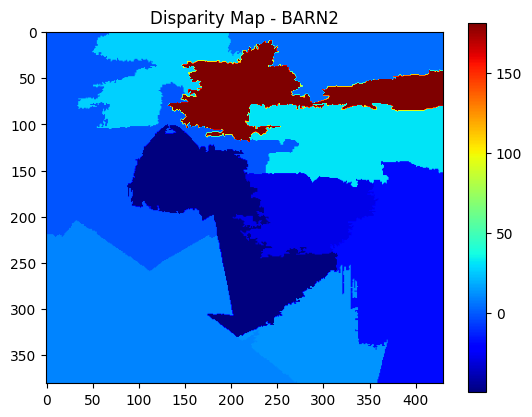

In [5]:
import cv2
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from skimage.color import rgb2lab

def oversegment_image(image, num_segments):
    segments = slic(image, n_segments=num_segments, compactness=10)
    return segments

def compute_superpixel_descriptors(image, segments):
    num_segments = segments.max() + 1
    descriptors = []
    lab_image = rgb2lab(image)
    
    for i in range(num_segments):
        mask = segments == i
        # Compute color histogram
        masked_colors = lab_image[mask]
        color_hist, _ = np.histogram(masked_colors, bins=256, range=(0, 100))
        color_hist = color_hist / color_hist.sum()  # Normalize histogram
        
        # Compute texture feature (Laplacian variance)
        float_mask = mask.astype(np.float32)
        laplacian = cv2.Laplacian(float_mask, cv2.CV_32F)
        texture = laplacian.var()
        
        descriptors.append((color_hist, texture))
    
    return descriptors

def match_superpixels(descriptors_left, descriptors_right):
    matches = []
    for i, desc_left in enumerate(descriptors_left):
        best_match = -1
        best_score = float('inf')
        for j, desc_right in enumerate(descriptors_right):
            color_dist = np.linalg.norm(desc_left[0] - desc_right[0])
            texture_dist = abs(desc_left[1] - desc_right[1])
            score = color_dist + texture_dist
            if score < best_score:
                best_score = score
                best_match = j
        matches.append(best_match)
    return matches

def generate_disparity_map(segments_left, segments_right, matches):
    disparity_map = np.zeros_like(segments_left, dtype=np.float32)
    for i, match in enumerate(matches):
        if match != -1:  # Ensure there is a valid match
            disparity = np.mean(np.where(segments_left == i)[1]) - np.mean(np.where(segments_right == match)[1])
            disparity_map[segments_left == i] = disparity
    return disparity_map

# Main script
image_pairs = ['Sawtooth', 'Venus', 'Bull', 'Poster', 'Barn1', 'Barn2']
num_segments = 21

left_img = cv2.imread('docs/barn2/im0.ppm')
right_img = cv2.imread('docs/barn2/im8.ppm')

segments_left = oversegment_image(left_img, num_segments)
segments_right = oversegment_image(right_img, num_segments)

descriptors_left = compute_superpixel_descriptors(left_img, segments_left)
descriptors_right = compute_superpixel_descriptors(right_img, segments_right)

matches = match_superpixels(descriptors_left, descriptors_right)
disparity_map = generate_disparity_map(segments_left, segments_right, matches)

plt.figure()
plt.imshow(disparity_map, cmap='jet')
plt.title(f'Disparity Map - BARN2')
plt.colorbar()
plt.show()


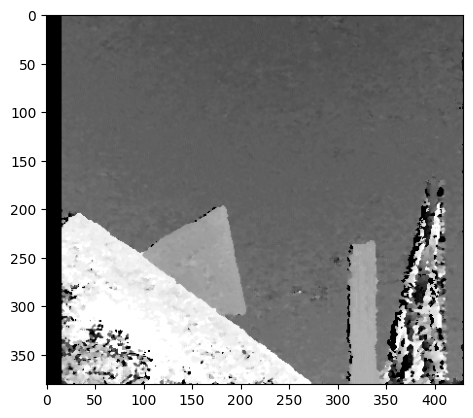

In [6]:
#Code for implementing the Semi-Global matching algorithm using the Open CV library
#This Assignment is done using Google Collab
import sys
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Image names
imagePairs = ['corridor']

# Loop to get the images.
for imagePair in imagePairs:
    # Reading Left and Right images
    imgL = cv2.imread('docs/barn2/im0.ppm', 0)
    imgR = cv2.imread('docs/barn2/im5.ppm', 0)

    #Compute the diparity. BlockSize determines the image patch size
    stereo = cv2.StereoSGBM_create(blockSize=1)
    disparity = stereo.compute(imgL, imgR)
    #Ploting the image disparity
    plt.imshow(disparity, 'gray')
    plt.show()